# Heat Maps

In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
diamonds = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/Diamonds Prices2022.csv')

In [53]:
diamond_pivot = diamonds.pivot_table(
    index="cut",
    columns="color",
    values={"carat": "mean"}
)

diamond_pivot.head()

carat                                                    \
color             D         E         F         G         H         I   
cut                                                                     
Fair       0.920123  0.856607  0.904712  1.023822  1.219175  1.198057   
Good       0.744517  0.745134  0.775930  0.850896  0.914729  1.057222   
Ideal      0.565766  0.578401  0.655829  0.700715  0.799525  0.913029   
Premium    0.721547  0.717742  0.826985  0.841488  1.016449  1.144937   
Very Good  0.696424  0.676327  0.740961  0.766799  0.915948  1.046952   

                     
color             J  
cut                  
Fair       1.341176  
Good       1.099544  
Ideal      1.063594  
Premium    1.293094  
Very Good  1.133215

<Axes: xlabel='None-color', ylabel='cut'>

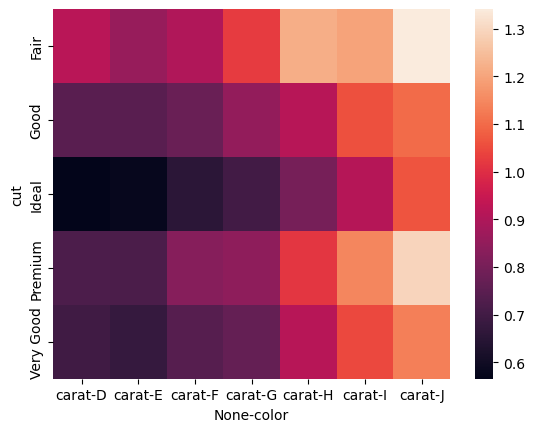

In [55]:
sns.heatmap(
    data=diamond_pivot
)

<Axes: xlabel='color', ylabel='cut'>

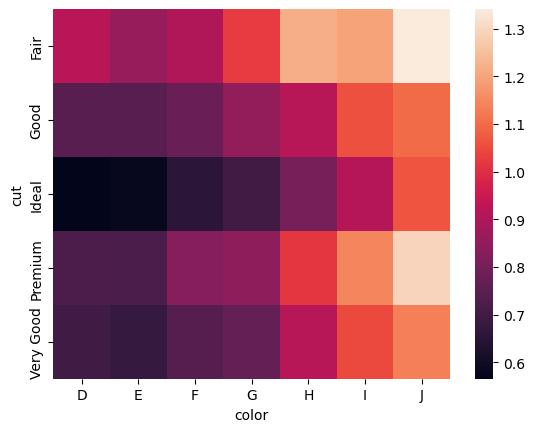

In [57]:
sns.heatmap(diamond_pivot.droplevel(0, axis=1))

<Axes: xlabel='None-color', ylabel='cut'>

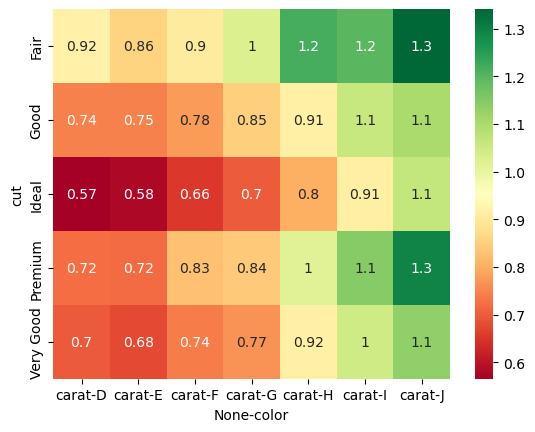

In [59]:
sns.heatmap(
    data=diamond_pivot,
    annot=True,
    #fmt="g",
    cmap="RdYlGn"
)

<Axes: >

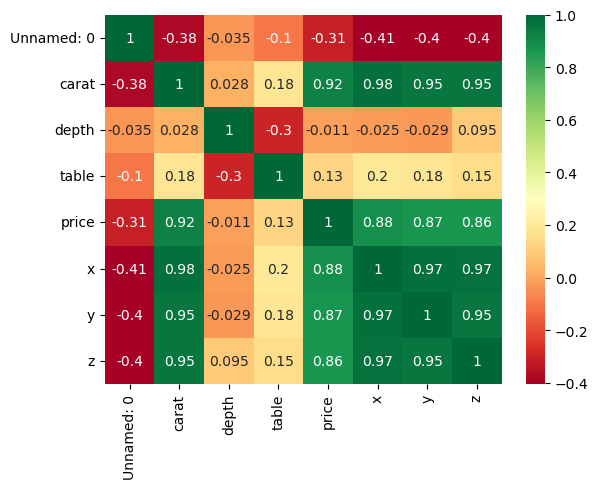

In [61]:
sns.heatmap(
    data=diamonds.select_dtypes(include=['number']).corr(),
    annot=True,
    cmap="RdYlGn"
)

# FacetGrid

In [64]:
housing_raw = pd.read_csv(
    '/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

bins = np.linspace(0, 1750000, 8)
labels = ["0-250k", "250k-500k", "500k-750k", "750k-1m", "1-1.25m", "1.25m-1.5m", "1.5m+"]

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(
        region_name = housing_raw["region_name"].str[0:-11],
        price_bins = pd.cut(housing_raw["median_active_list_price"], 
                            bins=bins, 
                            labels=labels
                           )
    )
)

county_list = ["Los Angeles", "San Diego", "San Francisco", "Tulare"]

ca_housing = ca_housing.loc[ca_housing["region_name"].isin(county_list)]

ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k


/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


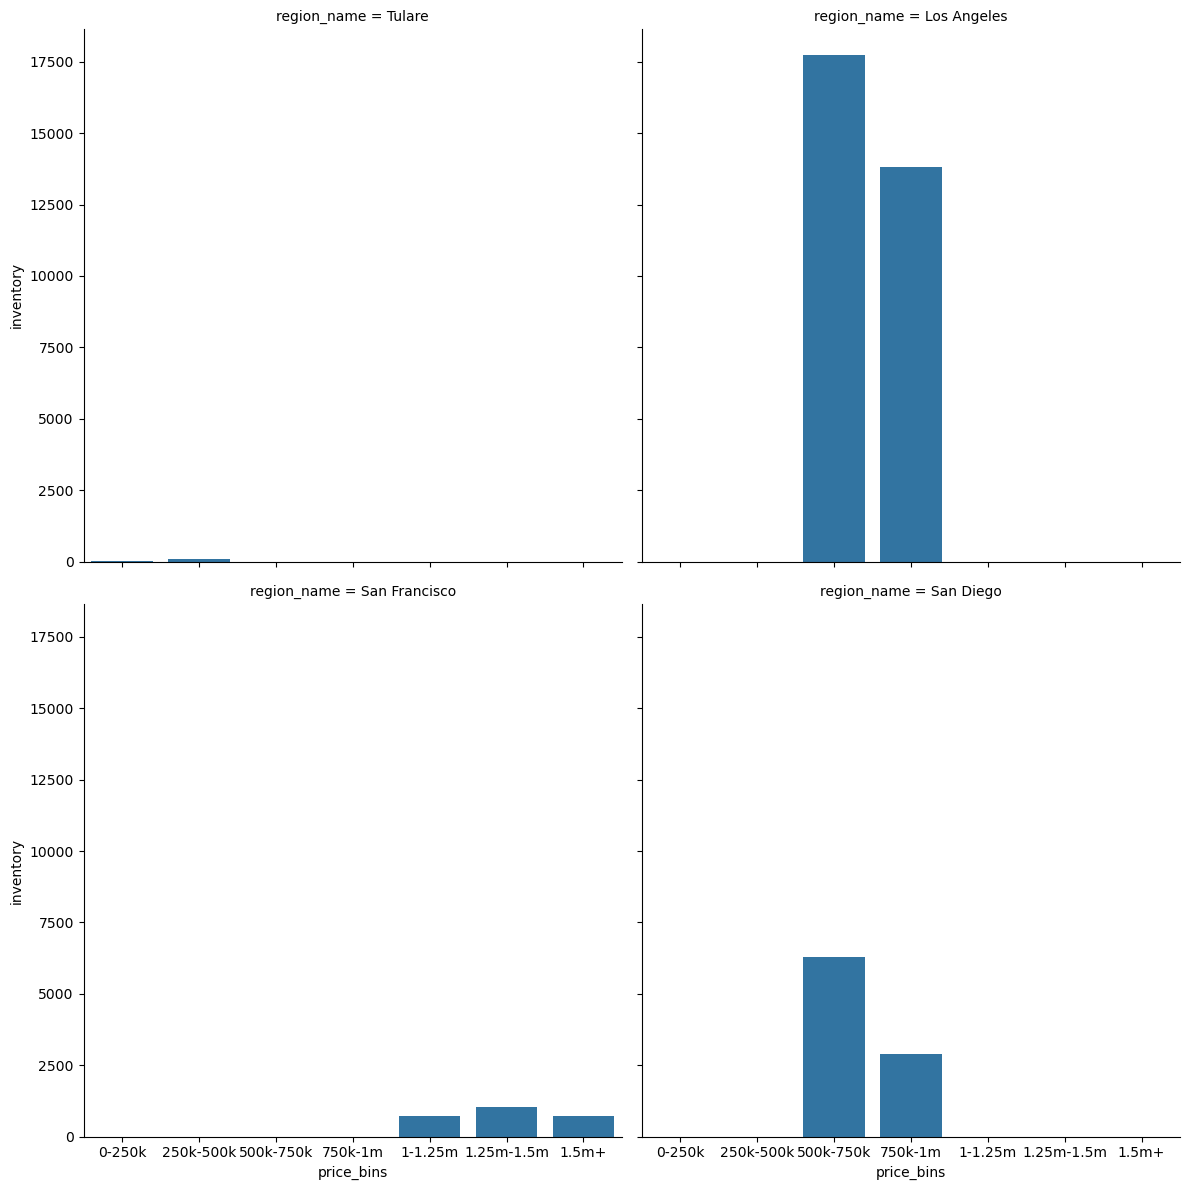

In [80]:
g=sns.FacetGrid(
    data=ca_housing,
    col="region_name",
    col_wrap=2,
    height=6
)

g.map_dataframe(sns.barplot,x="price_bins",y="inventory",ci=None)